#### Adaboost Model

- Machine learning model based on ensemble techniques
- Adaboost can be used for both **regression** as well as **classification** problems, however, generally used in classification problems
- Implementation using Python

In [1]:
#Importing python libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


#### EDA - Exploratory Data Analysis

In [2]:
#Since the provided data does not have any column heading - creating a list of colnames and will be applied to dataset

colnames = ['Id', 'Diagnosis', 'Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean', 'Smoothness_mean', 'Compactness_mean', 'Concavity_mean','Concave points_mean','Symmetry_mean','Fractal_dimension_mean',
'Radius_se','Texture_se','Perimeter_se','Area_se','Smoothness_se','Compactness_se','Concavity_se','Concave points_se','Symmetry_se','Fractal_dimension_se',
'Radius_worst','Texture_worst','Perimeter_worst','Area_worst','Smoothness_worst','Compactness_worst','Concavity_worst','Concave points_worst','Symmetry_worst','Fractal_dimension_worst']

In [3]:
#Reading the data

wdbc_df = pd.read_csv('wdbc_data.csv',names=colnames)

In [4]:
# Getting an overview of data

wdbc_df.head(10)

,Id,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave points_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave points_worst,Symmetry_worst,Fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [5]:
#Checking data types of each attribute and checking for null values as well

wdbc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   Perimeter_mean           569 non-null    float64
 5   Area_mean                569 non-null    float64
 6   Smoothness_mean          569 non-null    float64
 7   Compactness_mean         569 non-null    float64
 8   Concavity_mean           569 non-null    float64
 9   Concave points_mean      569 non-null    float64
 10  Symmetry_mean            569 non-null    float64
 11  Fractal_dimension_mean   569 non-null    float64
 12  Radius_se                569 non-null    float64
 13  Texture_se               569 non-null    float64
 14  Perimeter_se             5

In [6]:
#Checking mean, median and other statistical values of numeric attributes

wdbc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
Radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
Texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
Perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
Area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
Smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
Compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
Concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
Concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
Symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [7]:
#Getting count of each of the category(class i.e B = benign, M = malignant)

wdbc_df.groupby(['Diagnosis']).count()

,Id,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave points_mean,Symmetry_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave points_worst,Symmetry_worst,Fractal_dimension_worst
Diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [8]:
#Changing labels from M and B to -1 and 1

wdbc_df['Diagnosis'] = wdbc_df['Diagnosis'].replace({'B':1,'M':-1})

In [9]:
wdbc_df.head(10)

,Id,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave points_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave points_worst,Symmetry_worst,Fractal_dimension_worst
0,842302,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,-1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,-1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,-1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,-1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,-1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [10]:
#Checking for data types and null values

wdbc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       569 non-null    int64  
 1   Diagnosis                569 non-null    int64  
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   Perimeter_mean           569 non-null    float64
 5   Area_mean                569 non-null    float64
 6   Smoothness_mean          569 non-null    float64
 7   Compactness_mean         569 non-null    float64
 8   Concavity_mean           569 non-null    float64
 9   Concave points_mean      569 non-null    float64
 10  Symmetry_mean            569 non-null    float64
 11  Fractal_dimension_mean   569 non-null    float64
 12  Radius_se                569 non-null    float64
 13  Texture_se               569 non-null    float64
 14  Perimeter_se             5

In [11]:
# Checking pair plots after transforming lables, visualizing the data

# sns.pairplot(wdbc_df, diag_kind='kde')

In [12]:
#Dropping the Id column

wdbc_df = wdbc_df.drop('Id',axis=1)

In [13]:
#Verifying data after dropping the column

wdbc_df.head(10)

,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave points_mean,Symmetry_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave points_worst,Symmetry_worst,Fractal_dimension_worst
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,-1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,-1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,-1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,-1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,-1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [14]:
# Checking statistical values 

wdbc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diagnosis,569.0,0.254833,0.967836,-1.000000,-1.000000,1.000000,1.000000,1.00000
Radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
Texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
Perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
Area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
Smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
Compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
Concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
Concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
Symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


#### Splitting train and test data set for model building

In [15]:
X = wdbc_df.drop('Diagnosis',axis=1)
y = wdbc_df['Diagnosis']

print(X.head())
print(y.head())

   Radius_mean  Texture_mean  Perimeter_mean  Area_mean  Smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   Compactness_mean  Concavity_mean  Concave points_mean  Symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   Fractal_dimension_mean  ...  Radius_worst  Texture_worst  Perimeter_worst  \
0           

In [16]:
#Splitting dataset in train and test as per requirement using first 300 sample as train set and remaining samples as test set

X_train = X.head(300)
X_test = X.tail(269)
y_train = y.head(300)
y_test = y.tail(269)


In [17]:
#Verifying splitted train dataset

X_train.head(10)

,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave points_mean,Symmetry_mean,Fractal_dimension_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave points_worst,Symmetry_worst,Fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [18]:
#Verifying splitted test dataset

X_test.head(10)

,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave points_mean,Symmetry_mean,Fractal_dimension_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave points_worst,Symmetry_worst,Fractal_dimension_worst
300,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.219700,0.106200,0.1792,0.06552,...,25.930,26.24,171.10,2053.0,0.14950,0.41160,0.61210,0.19800,0.2968,0.09929
301,12.46,19.89,80.43,471.3,0.08451,0.10140,0.068300,0.030990,0.1781,0.06249,...,13.460,23.07,88.13,551.3,0.10500,0.21580,0.19040,0.07625,0.2685,0.07764
302,20.09,23.86,134.70,1247.0,0.10800,0.18380,0.228300,0.128000,0.2249,0.07469,...,23.680,29.43,158.80,1696.0,0.13470,0.33910,0.49320,0.19230,0.3294,0.09469
303,10.49,18.61,66.86,334.3,0.10680,0.06678,0.022970,0.017800,0.1482,0.06600,...,11.060,24.54,70.76,375.4,0.14130,0.10440,0.08423,0.06528,0.2213,0.07842
304,11.46,18.16,73.59,403.1,0.08853,0.07694,0.033440,0.015020,0.1411,0.06243,...,12.680,21.61,82.69,489.8,0.11440,0.17890,0.12260,0.05509,0.2208,0.07638
305,11.60,24.49,74.23,417.2,0.07474,0.05688,0.019740,0.013130,0.1935,0.05878,...,12.440,31.62,81.39,476.5,0.09545,0.13610,0.07239,0.04815,0.3244,0.06745
306,13.20,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.410,20.45,92.00,636.9,0.11280,0.13460,0.01120,0.02500,0.2651,0.08385
307,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
308,13.50,12.71,85.69,566.2,0.07376,0.03614,0.002758,0.004419,0.1365,0.05335,...,14.970,16.94,95.48,698.7,0.09023,0.05836,0.01379,0.02210,0.2267,0.06192
309,13.05,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,0.1453,0.05518,...,14.730,17.40,93.96,672.4,0.10160,0.05847,0.01824,0.03532,0.2107,0.06580


In [19]:
#Verifying splitted train dataset

X_train.tail(10)

,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave points_mean,Symmetry_mean,Fractal_dimension_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave points_worst,Symmetry_worst,Fractal_dimension_worst
290,14.41,19.73,96.03,651.0,0.08757,0.16760,0.13620,0.06602,0.1714,0.07192,...,15.77,22.13,101.70,767.3,0.09983,0.24720,0.22200,0.10210,0.2272,0.08799
291,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,...,16.25,26.19,109.10,809.8,0.13130,0.30300,0.18040,0.14890,0.2962,0.08472
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.22410,0.10560,0.3380,0.09584
293,11.85,17.46,75.54,432.7,0.08372,0.05642,0.02688,0.02280,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007
294,12.72,13.78,81.78,492.1,0.09667,0.08393,0.01288,0.01924,0.1638,0.06100,...,13.50,17.48,88.54,553.7,0.12980,0.14720,0.05233,0.06343,0.2369,0.06922
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,...,14.67,16.93,94.17,661.1,0.11700,0.10720,0.03732,0.05802,0.2823,0.06794
296,10.91,12.35,69.14,363.7,0.08518,0.04721,0.01236,0.01369,0.1449,0.06031,...,11.37,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643
297,11.76,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,0.1619,0.06287,...,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
299,10.51,23.09,66.85,334.2,0.10150,0.06797,0.02495,0.01875,0.1695,0.06556,...,10.93,24.22,70.10,362.7,0.11430,0.08614,0.04158,0.03125,0.2227,0.06777


In [20]:
#Verifying splitted test dataset

X_test.tail(10)

,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave points_mean,Symmetry_mean,Fractal_dimension_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave points_worst,Symmetry_worst,Fractal_dimension_worst
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [21]:
#Checking the number of data points in divided dataset

print(X_train.shape)
print(X_test.shape)

(300, 30)
(269, 30)


In [22]:
#Checking distribution of data points 

print(y_train.shape)
print(y_test.shape)

(300,)
(269,)


In [23]:
print(y_train.head(10))
print(y_test.head(10))

0   -1
1   -1
2   -1
3   -1
4   -1
5   -1
6   -1
7   -1
8   -1
9   -1
Name: Diagnosis, dtype: int64
300   -1
301    1
302   -1
303    1
304    1
305    1
306    1
307    1
308    1
309    1
Name: Diagnosis, dtype: int64


In [24]:
print(y_train.tail(10))
print(y_test.tail(10))

290    1
291    1
292    1
293    1
294    1
295    1
296    1
297   -1
298    1
299    1
Name: Diagnosis, dtype: int64
559    1
560    1
561    1
562   -1
563   -1
564   -1
565   -1
566   -1
567   -1
568    1
Name: Diagnosis, dtype: int64


#### Adaboost algorithm implemetation

In [25]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline 

class AdaBoost:
    
    def __init__(self,n_estimators=50):
        
        self.n_estimators = n_estimators
        self.alphas = np.ones(shape=n_estimators)
        self.errors = np.ones(shape=n_estimators)
        
        
    def fit(self,X,y):
        
        N = X.shape[0]
        
        #Intialize weights to 1/N
        weights = np.array([1/N for i in range(N)])
        
        self.weak_learner_list = []
        
        #Iterating through weak learner and updating weights
        
        for t in range(self.n_estimators):
            
            decision_stump = DecisionTreeClassifier(max_depth=1) #keeping criterion as gini
            decision_stump.fit(X,y,sample_weight=weights)
            
            #Predictig classifiers using decision_stump weak_learner
            decision_stump_pred = decision_stump.predict(X)
            
            #Calculating error and weights(alpha) of misclassified samples
            misclassified_samples = weights[y!=decision_stump_pred]
            err = sum(misclassified_samples) 
            alpha = 0.5 * np.log((1-err)/err)
            
            #Updating weights
            weights = weights * np.exp(-alpha * y * decision_stump_pred)
            weights = weights/np.sum(weights)
            
            #Saving weak_lerner classifiers model
            self.weak_learner_list.append(decision_stump)
            self.alphas[t] = alpha
            self.errors[t] = err
            
    def predict(self,X):
        
        clf_pred = np.array([decision_stump.predict(X) for decision_stump in self.weak_learner_list])
        y_pred = np.sign(np.dot(self.alphas, clf_pred))
        
        return y_pred
    
    def model_score(self,y_true,y_pred):
        acc = accuracy_score(y_true,y_pred)
        return acc
    
    def plot(self):
        print("Error : ", (self.errors))
        plt.plot(self.errors)
        plt.xlabel("Number of iterations")
        plt.ylabel("Error")
        plt.show()
        

In [26]:
#Calling Adaboost class - which is implemented above - passing n_estimators = 5

adaboost = AdaBoost(n_estimators=5)

In [27]:
#Calling fit method to train the model

adaboost.fit(X_train,y_train)

In [28]:
#Classifying the labels 

y_pred = adaboost.predict(X_test) # test

In [29]:
train_label = adaboost.predict(X_train) # train

In [30]:
#Checking the train data accuracy of implemented model for n_estimators = 5

from sklearn import metrics

print(metrics.confusion_matrix(y_train,train_label))
print(metrics.classification_report(y_train,train_label)) 

[[137   9]
 [  4 150]]
              precision    recall  f1-score   support

          -1       0.97      0.94      0.95       146
           1       0.94      0.97      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [31]:
#Checking the test data accuracy of implemented model

from sklearn import metrics

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred)) 

[[ 62   4]
 [  8 195]]
              precision    recall  f1-score   support

          -1       0.89      0.94      0.91        66
           1       0.98      0.96      0.97       203

    accuracy                           0.96       269
   macro avg       0.93      0.95      0.94       269
weighted avg       0.96      0.96      0.96       269



In [32]:
train_acc = adaboost.model_score(y_train,train_label)
print("Train accuracy : ", train_acc)  # for n_estimators = 5

test_acc = adaboost.model_score(y_test,y_pred)  # for n_estimators = 5
print("Test accuracy : ", test_acc)

Train accuracy :  0.9566666666666667
Test accuracy :  0.9553903345724907


Error :  [0.08       0.21014493 0.15343246 0.25791209 0.25569889]


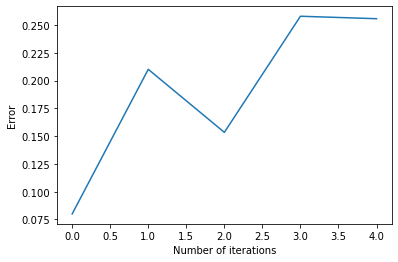

In [33]:
#Plotting train error at each iteration
adaboost.plot()

In [34]:
#Calling Adaboost class - which is implemented above - passing n_estimators = 50

adaboost = AdaBoost(n_estimators=50)

In [35]:
#Calling fit method to train the model

adaboost.fit(X_train,y_train)

In [36]:
#Classifying the labels 

y_prediction = adaboost.predict(X_test)

In [37]:
train_clf = adaboost.predict(X_train)

In [38]:
#Checking the train data accuracy of implemented model with n_estimators = 50

from sklearn import metrics

print(metrics.confusion_matrix(y_train,train_clf))
print(metrics.classification_report(y_train,train_clf)) 

[[146   0]
 [  0 154]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       154

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [39]:
#Printing confusion matrix and classification report and checking the accuracy test set with n_estimators = 50

print(metrics.confusion_matrix(y_test,y_prediction))
print(metrics.classification_report(y_test,y_prediction))

[[ 64   2]
 [ 10 193]]
              precision    recall  f1-score   support

          -1       0.86      0.97      0.91        66
           1       0.99      0.95      0.97       203

    accuracy                           0.96       269
   macro avg       0.93      0.96      0.94       269
weighted avg       0.96      0.96      0.96       269



In [40]:
#Accuracy of the implemented model

train_acc = adaboost.model_score(y_train,train_clf) # for n_estimators = 50
print("Train accuracy : ", train_acc)

test_acc = adaboost.model_score(y_test,y_prediction) # for n_estimators = 50
print("Test accuracy : ", test_acc)

Train accuracy :  1.0
Test accuracy :  0.9553903345724907


Error :  [0.08       0.21014493 0.15343246 0.25791209 0.25569889 0.2573787
 0.30586132 0.25403563 0.3324979  0.32516118 0.2018753  0.30514466
 0.30597424 0.25707295 0.28945542 0.26499711 0.28949367 0.34827147
 0.29594989 0.33954475 0.37711921 0.35514443 0.33015386 0.32957768
 0.35843559 0.31306619 0.31175551 0.34209887 0.28952976 0.32547761
 0.30780073 0.30504088 0.32913267 0.28979473 0.30227558 0.29109535
 0.34847014 0.31412626 0.25307299 0.29397666 0.35561221 0.31205534
 0.35551973 0.31161698 0.33649969 0.31335962 0.29096537 0.28828842
 0.30246434 0.33925943]


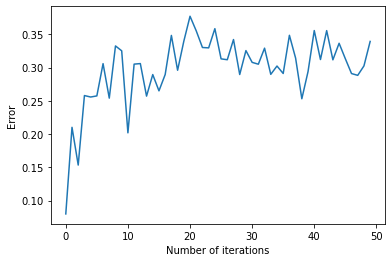

In [41]:
adaboost.plot()

In [42]:
#Calling Adaboost class - which is implemented above - passing n_estimators = 100

adaboost = AdaBoost(n_estimators=100)

In [43]:
#Calling fit method to train the model

adaboost.fit(X_train,y_train)

In [44]:
#Classifying the labels 

y_predictions = adaboost.predict(X_test)

In [45]:
train_clfs = adaboost.predict(X_train)

In [46]:
#Checking the train data accuracy of implemented model with n_estimators = 100

print(metrics.confusion_matrix(y_train,train_clfs))
print(metrics.classification_report(y_train,train_clfs)) 

[[146   0]
 [  0 154]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       154

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [47]:
#Printing confusion matrix and classification report and checking the accuracy test set

print(metrics.confusion_matrix(y_test,y_predictions))
print(metrics.classification_report(y_test,y_predictions))

[[ 65   1]
 [  8 195]]
              precision    recall  f1-score   support

          -1       0.89      0.98      0.94        66
           1       0.99      0.96      0.98       203

    accuracy                           0.97       269
   macro avg       0.94      0.97      0.96       269
weighted avg       0.97      0.97      0.97       269



In [48]:
#Accuracy of the implemented model

train_acc = adaboost.model_score(y_train,train_clfs) # for n_estimators = 100
print("Train accuracy : ", train_acc)

test_acc = adaboost.model_score(y_test,y_predictions) # for n_estimators = 100
print("Test accuracy : ", test_acc)

Train accuracy :  1.0
Test accuracy :  0.966542750929368


Error :  [0.08       0.21014493 0.15343246 0.25791209 0.25569889 0.2573787
 0.30586132 0.25403563 0.3324979  0.32516118 0.2018753  0.30514466
 0.30597424 0.25707295 0.28945542 0.26499711 0.28949367 0.34827147
 0.29594989 0.33954475 0.37711921 0.35514443 0.33015386 0.32957768
 0.35843559 0.31306619 0.31175551 0.34209887 0.28952976 0.32547761
 0.30780073 0.30504088 0.32913267 0.28979473 0.30227558 0.29109535
 0.34847014 0.31412626 0.25307299 0.29397666 0.35561221 0.31205534
 0.35551973 0.31161698 0.33649969 0.31335962 0.29096537 0.28828842
 0.30246434 0.33925943 0.38965768 0.33917781 0.29809233 0.34527191
 0.41385135 0.30454809 0.34971548 0.34015564 0.30620944 0.33506099
 0.29909412 0.31800382 0.3486299  0.31948248 0.34868757 0.32480692
 0.34769067 0.33297989 0.3711899  0.29652982 0.30562998 0.32306878
 0.32464924 0.30128056 0.34938675 0.29070537 0.326287   0.32889066
 0.31649193 0.32192498 0.32735384 0.34929023 0.34961436 0.33960256
 0.35448912 0.34240144 0.36150336 0.34711788 0.3141424

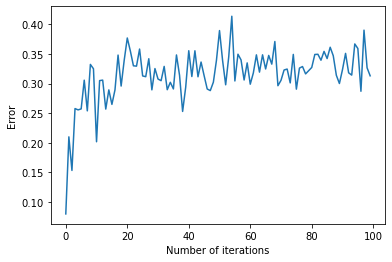

In [49]:
adaboost.plot()

#### Using scikit learn classification model to compare output with the implemented model

#### 1) SVM model - Using scikit learn SVM

In [50]:
#Calling and instantiating sklearn svm class

svm_clf = svm.SVC(kernel='linear')

In [51]:
#Calling fit method 

svm_clf.fit(X_train,y_train)

SVC(kernel='linear')

In [52]:
#Classifying labels using test set

y_pred = svm_clf.predict(X_test)

In [53]:
#Checking test accuracy

print(svm_clf)

print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

SVC(kernel='linear')
              precision    recall  f1-score   support

          -1       0.86      0.98      0.92        66
           1       0.99      0.95      0.97       203

    accuracy                           0.96       269
   macro avg       0.93      0.97      0.94       269
weighted avg       0.96      0.96      0.96       269

[[ 65   1]
 [ 11 192]]


In [54]:
#Checking train and test model score and accuracy

print(svm_clf.score(X_train,y_train))
print(svm_clf.score(X_test,y_test))

0.96
0.9553903345724907


In [55]:
#Instantiating SVM with C = 10 

svm_clf = svm.SVC(C=10,kernel='linear')

In [56]:
#Calling fit method 

svm_clf.fit(X_train,y_train)

SVC(C=10, kernel='linear')

In [57]:
#Classifying labels using test set

y_pred = svm_clf.predict(X_test)

In [58]:
#Checking test accuracy

print(svm_clf)

print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

SVC(C=10, kernel='linear')
              precision    recall  f1-score   support

          -1       0.82      0.98      0.90        66
           1       0.99      0.93      0.96       203

    accuracy                           0.94       269
   macro avg       0.91      0.96      0.93       269
weighted avg       0.95      0.94      0.95       269

[[ 65   1]
 [ 14 189]]


In [59]:
#Checking train and test model score and accuracy

print(svm_clf.score(X_train,y_train))
print(svm_clf.score(X_test,y_test))

0.9633333333333334
0.9442379182156134


In [60]:
#Instantiating SVM for C = 100

svm_clf = svm.SVC(C=100,kernel='linear')

In [61]:
#Calling fit method 

svm_clf.fit(X_train,y_train)

SVC(C=100, kernel='linear')

In [62]:
#Classifying labels using test set

y_pred = svm_clf.predict(X_test)

In [63]:
#Checking test accuracy

print(svm_clf)

print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

SVC(C=100, kernel='linear')
              precision    recall  f1-score   support

          -1       0.90      0.98      0.94        66
           1       0.99      0.97      0.98       203

    accuracy                           0.97       269
   macro avg       0.95      0.98      0.96       269
weighted avg       0.97      0.97      0.97       269

[[ 65   1]
 [  7 196]]


In [64]:
#Checking train and test model score and accuracy

print(svm_clf.score(X_train,y_train))
print(svm_clf.score(X_test,y_test))

0.9633333333333334
0.9702602230483272


#### 2) Decision Tree Model using scikit learn

In [65]:
# Using Decision tree model and checking the output - decision stump as restricting max_depth = 1 

dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth=1)

In [66]:
#Fitting the decision stump model

dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [67]:
#Classifying labels using decision stump model

y_predict = dt_model.predict(X_test)

In [68]:
#Checking train and test model score and accuracy

print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))

0.92
0.9182156133828996


In [69]:
#Checking accuracy

print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test,y_predict))

[[ 62   4]
 [ 18 185]]
              precision    recall  f1-score   support

          -1       0.78      0.94      0.85        66
           1       0.98      0.91      0.94       203

    accuracy                           0.92       269
   macro avg       0.88      0.93      0.90       269
weighted avg       0.93      0.92      0.92       269



In [70]:
#Calling matplotlib for plotting decision tree - which in this case is decision stump as max_depth restricted to 1

import matplotlib.pyplot as plt
%matplotlib inline

[Text(195.3, 285.39, 'X[22] <= 106.05\ngini = 0.5\nsamples = 300\nvalue = [146, 154]'),
 Text(97.65, 95.13, 'gini = 0.162\nsamples = 158\nvalue = [14, 144]'),
 Text(292.95000000000005, 95.13, 'gini = 0.131\nsamples = 142\nvalue = [132, 10]')]

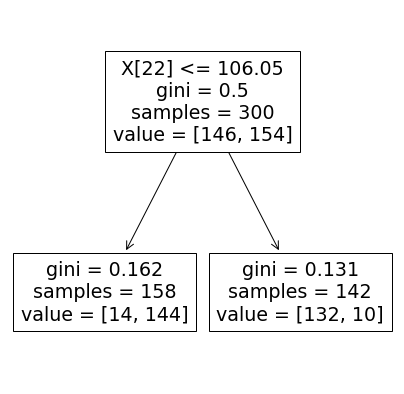

In [71]:
from sklearn import tree

fig = plt.figure(figsize=(7,7))

tree.plot_tree(dt_model)

In [72]:
#Using decision tree classifier without restricting max_depth, i.e. tree with depth greater than 1

dt_model = DecisionTreeClassifier(criterion = 'gini') 

In [73]:
#Fitting the model

dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
#Classifying labels using decision tree classifier model

y_predict = dt_model.predict(X_test)

In [75]:
#Checking train and test model score and accuracy

print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))

1.0
0.9107806691449815


In [76]:
#Checking accuracy

print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test,y_predict))

[[ 64   2]
 [ 22 181]]
              precision    recall  f1-score   support

          -1       0.74      0.97      0.84        66
           1       0.99      0.89      0.94       203

    accuracy                           0.91       269
   macro avg       0.87      0.93      0.89       269
weighted avg       0.93      0.91      0.91       269



#### 3) Adaboost Classifier using sklearn

In [77]:
#Calling AdaBoost class of sklearn and using base_estimator(weak learner) as decision stump for n_estimators = 5

abcl_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators=5,learning_rate=1)

In [78]:
#Calling fit method

abcl_model.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=5)

In [79]:
#Predicting labels using Adaboost

train_labels = abcl_model.predict(X_train)
y_pre = abcl_model.predict(X_test)

In [80]:
#Checking train and test model score and accuracy

print(abcl_model.score(X_train,y_train))
print(abcl_model.score(X_test,y_test))

0.9533333333333334
0.9330855018587361


In [81]:
#Checking accuracy train set

print(metrics.confusion_matrix(y_train, train_labels))
print(metrics.classification_report(y_train,train_labels))

[[140   6]
 [  8 146]]
              precision    recall  f1-score   support

          -1       0.95      0.96      0.95       146
           1       0.96      0.95      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [82]:
#Checking accuracy test set

print(metrics.confusion_matrix(y_test, y_pre))
print(metrics.classification_report(y_test,y_pre))

[[ 63   3]
 [ 15 188]]
              precision    recall  f1-score   support

          -1       0.81      0.95      0.88        66
           1       0.98      0.93      0.95       203

    accuracy                           0.93       269
   macro avg       0.90      0.94      0.91       269
weighted avg       0.94      0.93      0.93       269



Error :  [0.08       0.19852018 0.18118357 0.25517804 0.24103419]


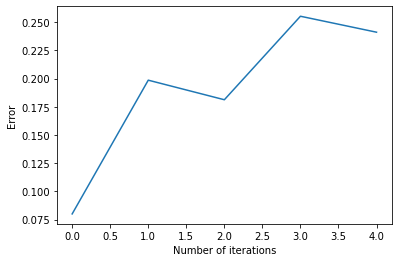

In [83]:
#Plotting graph for sklearn adaboost classifiers - checking error at each iteration - n_estimators = 5

print("Error : ",(abcl_model.estimator_errors_))
plt.plot(abcl_model.estimator_errors_)
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

In [84]:
#Calling AdaBoost class of sklearn and using base_estimator(weak learner) as decision stump for n_estimators = 50

abcl_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators=50,learning_rate=1)

In [85]:
#Calling fit method

abcl_model.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1)

In [86]:
#Predicting labels using Adaboost

y_pre = abcl_model.predict(X_test)

In [87]:
#Checking train and test model score and accuracy

print(abcl_model.score(X_train,y_train))
print(abcl_model.score(X_test,y_test))

1.0
0.9702602230483272


In [88]:
#Checking test accuracy 

print(metrics.confusion_matrix(y_test, y_pre))
print(metrics.classification_report(y_test,y_pre))

[[ 66   0]
 [  8 195]]
              precision    recall  f1-score   support

          -1       0.89      1.00      0.94        66
           1       1.00      0.96      0.98       203

    accuracy                           0.97       269
   macro avg       0.95      0.98      0.96       269
weighted avg       0.97      0.97      0.97       269



Error :  [0.08       0.19852018 0.18118357 0.25517804 0.24103419 0.28572091
 0.24944361 0.22835468 0.2411675  0.26116472 0.26347358 0.28489127
 0.29132459 0.24072886 0.30623795 0.28909802 0.31724063 0.32699409
 0.27563126 0.27500863 0.25378379 0.27965249 0.30607939 0.3587869
 0.31884499 0.24722923 0.29411162 0.3612274  0.32362547 0.32289113
 0.34048302 0.31381606 0.29781343 0.32425174 0.36340441 0.28683866
 0.3236396  0.25535249 0.30482351 0.22992926 0.21766051 0.23416291
 0.27286553 0.29874586 0.29322326 0.30446885 0.31094462 0.31222449
 0.24377217 0.31845825]


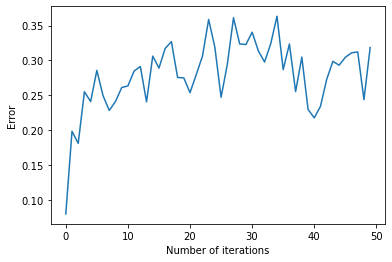

In [89]:
#Plotting graph for sklearn adaboost classifiers - checking error at each iteration - n_estimators = 50

print("Error : ",(abcl_model.estimator_errors_))
plt.plot(abcl_model.estimator_errors_)
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

In [90]:
#Calling AdaBoost class of sklearn and using base_estimator(weak learner) as decision stump for n_estimators = 100

abcl_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators=100,learning_rate=1)

In [91]:
#Calling fit method

abcl_model.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=100)

In [92]:
#Predicting labels using Adaboost

y_pre = abcl_model.predict(X_test)

In [93]:
#Checking train and test model score and accuracy

print(abcl_model.score(X_train,y_train))
print(abcl_model.score(X_test,y_test))

1.0
0.966542750929368


In [94]:
#Checking accuracy 

print(metrics.confusion_matrix(y_test, y_pre))
print(metrics.classification_report(y_test,y_pre))

[[ 65   1]
 [  8 195]]
              precision    recall  f1-score   support

          -1       0.89      0.98      0.94        66
           1       0.99      0.96      0.98       203

    accuracy                           0.97       269
   macro avg       0.94      0.97      0.96       269
weighted avg       0.97      0.97      0.97       269



Error :  [0.08       0.19852018 0.18118357 0.25517804 0.24103419 0.28572091
 0.24944361 0.22835468 0.2411675  0.26116472 0.26347358 0.28489127
 0.29132459 0.24072886 0.30623795 0.28909802 0.31724063 0.32699409
 0.27563126 0.27500863 0.25378379 0.27965249 0.30607939 0.3587869
 0.31884499 0.24722923 0.29411162 0.3612274  0.32362547 0.32289113
 0.34048302 0.31381606 0.29781343 0.32425174 0.36340441 0.28683866
 0.3236396  0.25535249 0.30482351 0.22992926 0.21766051 0.23416291
 0.27286553 0.29874586 0.29322326 0.30446885 0.31094462 0.31222449
 0.24377217 0.31845825 0.33548032 0.2925787  0.31235576 0.30510196
 0.34589505 0.33595966 0.27037874 0.27046181 0.25859354 0.29952234
 0.25548909 0.35226518 0.25623715 0.29572794 0.32078426 0.28323453
 0.28388977 0.26464651 0.34099163 0.28044326 0.37391221 0.31756283
 0.25105303 0.32857702 0.28720133 0.29594315 0.27968728 0.25042524
 0.27867578 0.3387406  0.25711248 0.25674125 0.25386304 0.29270999
 0.26577379 0.26770327 0.24645684 0.33872128 0.2772760

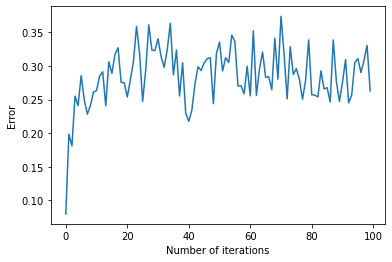

In [95]:
#Plotting graph for sklearn adaboost classifiers - checking error at each iteration - n_estimators = 100

print("Error : ",(abcl_model.estimator_errors_))
plt.plot(abcl_model.estimator_errors_)
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

In [96]:
#Using NaiveBayes as weak classifier in sklearn Adaboost classifier and checking the output

abcl_model_2 = AdaBoostClassifier(base_estimator=GaussianNB(),n_estimators=50,learning_rate=1)

In [97]:
#Calling fit method to train the model

abcl_model_2.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=GaussianNB(), learning_rate=1)

In [98]:
#Predicting classifiers

y_pred = abcl_model_2.predict(X_test)

In [99]:
# Checking train and test model score and accuracy

print(abcl_model_2.score(X_train,y_train))
print(abcl_model_2.score(X_test,y_test))

0.94
0.9628252788104089


In [100]:
#Checking accuracy

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred)) 

[[ 59   7]
 [  3 200]]
              precision    recall  f1-score   support

          -1       0.95      0.89      0.92        66
           1       0.97      0.99      0.98       203

    accuracy                           0.96       269
   macro avg       0.96      0.94      0.95       269
weighted avg       0.96      0.96      0.96       269



#### 4) Naive Bayes Classifier using sklearn

In [101]:
#Calling GaussianNB class of sklearn

nb_model = GaussianNB()

In [102]:
#Calling fit method

nb_model.fit(X_train,y_train)

GaussianNB()

In [103]:
#Calling predict method

y_preds = nb_model.predict(X_test)

In [104]:
# Checking train and test model score and accuracy

print(nb_model.score(X_train,y_train))
print(nb_model.score(X_test,y_test))

0.9366666666666666
0.966542750929368


In [105]:
#Checking accuracy using confusion matrix

print(metrics.confusion_matrix(y_test,y_preds))
print(metrics.classification_report(y_test,y_preds))

[[ 63   3]
 [  6 197]]
              precision    recall  f1-score   support

          -1       0.91      0.95      0.93        66
           1       0.98      0.97      0.98       203

    accuracy                           0.97       269
   macro avg       0.95      0.96      0.96       269
weighted avg       0.97      0.97      0.97       269

